In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import visuals as vs
#Refer: http://scikit-learn.org/stable/modules/multiclass.html#multioutput-classification

In [144]:
features = pd.read_csv("F:\\ML\\MultiTarget\\features.csv")
target   = pd.read_csv("F:\\ML\\MultiTarget\\targets.csv")

In [128]:
print(features.shape, target.shape)
target.tail()

(1087, 102) (1087, 14)


,Set,Profile,Konclude_status,More_status,Hermit_status,Fact++_status,TrOWL_status,JFact_status,Konclude_RT,More_RT,Hermit_RT,Fact++_RT,TrOWL_RT,JFact_RT
1082,Test,EL,Correct,Correct,Correct,Correct,Correct,Correct,28,438,289,55,76,367
1083,Test,EL,Correct,Correct,Correct,Correct,Correct,Correct,7,428,305,61,80,364
1084,Test,EL,Correct,Correct,Correct,Correct,Correct,Timeout,952,2635,10786,0,8614,0
1085,Test,EL,Correct,Correct,Correct,Correct,Correct,Correct,108,1129,1266,340,604,2703
1086,Test,EL,Correct,Correct,Correct,Correct,Correct,Correct,18,608,544,139,145,685


In [145]:
from sklearn import preprocessing

def df_lbl_enc(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            lbl = preprocessing.LabelEncoder()
            df[c] = lbl.fit_transform(df[c])
            #print(c)
    return df

train_features = features.loc[features['Set'] == "Train"] 
test_features = features.loc[features['Set'] == "Test"] 
train_target  = target.loc[target['Set'] == "Train"] 
test_target   = target.loc[target['Set'] == "Test"]

features_cols = ['ExactCardinality', 'Cyclic Cls', 'HC_Avg_Sibling', 'HP_Avg_Sibling', 'obj_property_count', 
                 'HC_Max_Sibling', 'DisjointClasses', 'class_count', 'NPCD', 'Abox_size', 'HP_Cohesion', 'GCI', 
                 'ClassAssertion', 'C_Tangledness', 'AxiomsLogical_count', 'Onto_Cohesion', 'SubPropertyChainOf',
                 'P_Tangledness', 'Axioms_count', 'SubClassOf', 'PCD', 'TransitivePropRatio', 'Tbox_size', 'indiv_count',
                 'Existentiel', 'Tbox_ratio', 'AvgNesting', 'expressivity', 'IndivDiffRatio', 'OntoCCDensity', 
                 'C_MaxTangledness', 'Rbox_ratio', 'SubObjectPropertyOf', 'Intersection', 'GCI_Ratio']
#[c for c in features if c not in ['Set','Profile']]

target_cols = [c for c in target if c not in ['Set','Profile']]

train_features = df_lbl_enc(train_features[features_cols])
test_features  = df_lbl_enc(test_features[features_cols])
train_target   = df_lbl_enc(train_target[target_cols][['Konclude_status','Konclude_RT']])
test_target    = df_lbl_enc(test_target[target_cols][['Konclude_status','Konclude_RT']])


#test_cols = [c for c in test_features if c not in ['Set','Profile']]

C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [146]:
print(train_features.shape, train_target.shape, test_features.shape, test_target.shape)

(550, 35) (550, 2) (537, 35) (537, 2)


In [147]:
clf1 = RandomForestRegressor(100).fit(train_features, train_target)
print(clf1.score(test_features,test_target))

-0.161421933338


In [148]:
from sklearn.metrics import r2_score
print(r2_score(test_target,clf1.predict(test_features)))

-0.161421933338


C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


In [149]:
rfvalues = clf1.predict(test_features)

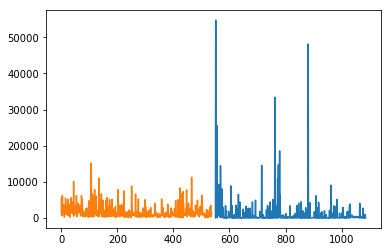

In [150]:
p =pd.DataFrame(clf1.predict(test_features),columns = ['ks','krt'])
test_target['Konclude_RT'].plot()
p['krt'].plot()

In [151]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.multioutput import MultiOutputClassifier
forest = RandomForestRegressor(n_estimators=40, random_state=1)
multi_target_forest = MultiOutputRegressor(forest, n_jobs=-1)
print(multi_target_forest.fit(train_features, train_target).score(test_features,test_target))
print(r2_score(test_target,multi_target_forest.predict(test_features)))

-0.280286358375
-0.16090315389


C:\Users\Hemant\AppData\Local\conda\conda\envs\aind-dog\lib\site-packages\sklearn\metrics\regression.py:482: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value which is deprecated since 0.17, it will be changed to 'uniform_average' starting from 0.19.
  DeprecationWarning)


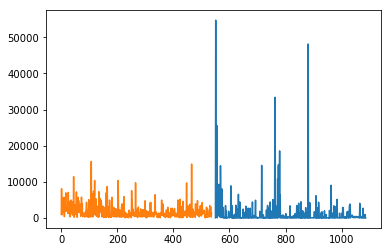

In [152]:
mlvalues = multi_target_forest.predict(test_features)
p =pd.DataFrame(multi_target_forest.predict(test_features),columns = ['ks','krt'])
test_target['Konclude_RT'].plot()
p['krt'].plot()

In [84]:
test_target.describe()

,Konclude_status,Konclude_RT
count,537.000000,537.000000
mean,0.115456,1208.778399
std,0.501568,4295.062767
min,0.000000,0.000000
25%,0.000000,7.000000
50%,0.000000,73.000000
75%,0.000000,425.000000
max,3.000000,54727.000000


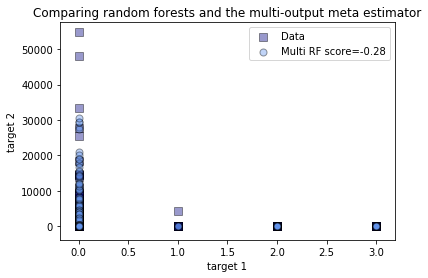

In [139]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(test_target.values[:, 0], test_target.values[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(train_target.values[:, 0], train_target.values[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % multi_target_forest.score(test_features, test_target))


plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

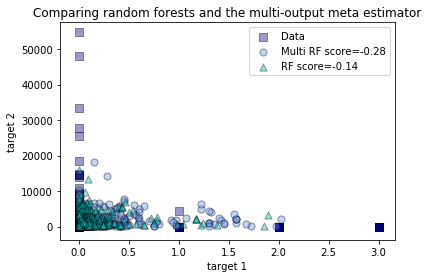

In [140]:
# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(test_target.values[:, 0], test_target.values[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(mlvalues[:, 0], mlvalues[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % multi_target_forest.score(test_features, test_target))
plt.scatter(rfvalues[:, 0], rfvalues[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % clf1.score(test_features, test_target))


plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

In [142]:
features = train_features.columns.tolist()
importances = clf1.feature_importances_
p = np.vstack((features,importances))

df = pd.DataFrame(p.transpose(),columns=['name','importance'])
dfsorted = df.sort_values(['importance'], ascending=False)
dfsorted['name']=df['name'].astype(str)
dfsorted['importance']=df['importance'].astype(float)

print(dfsorted.dtypes)

best_col = dfsorted.loc[dfsorted['importance'] > 0.01]

print(best_col['name'].tolist())

name           object
importance    float64
dtype: object
['ExactCardinality', 'Cyclic Cls', 'HC_Avg_Sibling', 'HP_Avg_Sibling', 'obj_property_count', 'HC_Max_Sibling', 'DisjointClasses', 'class_count', 'NPCD', 'Abox_size', 'HP_Cohesion', 'GCI', 'ClassAssertion', 'C_Tangledness', 'AxiomsLogical_count', 'Onto_Cohesion', 'SubPropertyChainOf', 'P_Tangledness', 'Axioms_count', 'SubClassOf', 'PCD', 'TransitivePropRatio', 'Tbox_size', 'indiv_count', 'Existentiel', 'Tbox_ratio', 'AvgNesting', 'expressivity', 'IndivDiffRatio', 'OntoCCDensity', 'C_MaxTangledness', 'Rbox_ratio', 'SubObjectPropertyOf', 'Intersection', 'GCI_Ratio']


KeyError: '[99 82 97 66 98 91 24 59 90 57 70 68 61 52 19 65 23 95 67 53 69 45 56 42 58\n 51 63 96 80 93 87  5 60 55 49 75 85 46 84 22 92 16  4 94 43 15 88 62 39 81\n 89 38 21 73 17 86 37 76 41 77 31 71 29  7 36  8 32 74  0 44 12 48 50 83 47\n 27 40 26 14  2 72 34  1 25 33 64 20 13 30  3 79 11 35 10 18 28 78  6  9 54] not in index'

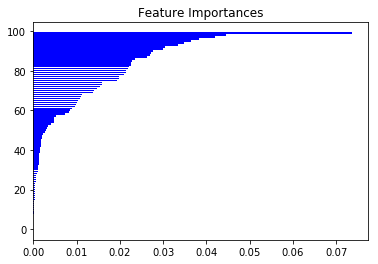

In [89]:

indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()